In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
import json
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
import scipy  # Import scipy to avoid NameError


# New_model 01 

In [4]:

def unet_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)
    
    # Downsample
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    
    # Bottleneck
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    
    # Upsample
    up1 = layers.UpSampling2D(size=(2, 2))(conv3)
    concat1 = layers.concatenate([conv2, up1], axis=-1)
    conv4 = layers.Conv2D(128, 3, activation='relu', padding='same')(concat1)
    conv4 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv4)
    
    up2 = layers.UpSampling2D(size=(2, 2))(conv4)
    concat2 = layers.concatenate([conv1, up2], axis=-1)
    conv5 = layers.Conv2D(64, 3, activation='relu', padding='same')(concat2)
    conv5 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv5)
    
    # Output
    outputs = layers.Conv2D(num_classes, 1, activation='softmax')(conv5)
    
    model = Model(inputs, outputs)
    return model


input_shape = (512, 512, 1)  
num_classes = 2  # Background + 1 labels

model = unet_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Path to the directory containing .npy files
image_dir = 'C:/ML_Data/0_data_new_train/image_preprocess'
label_dir = 'C:/ML_Data/0_data_new_train/label_preprocess'

# List all .npy files in the directory
image_list = [f for f in os.listdir(image_dir) if f.endswith('.npy')]
label_list = [f for f in os.listdir(label_dir) if f.endswith('.npy')]

# Load all files and stack them into a single array
X_train = np.array([np.load(os.path.join(image_dir, f)) for f in image_list])
y_train = np.array([np.load(os.path.join(label_dir, f)) for f in label_list])

#normalize y_train data
y_train = (y_train / 255).astype(np.uint8)

# Train the model
model.fit(X_train, y_train, batch_size=2, epochs=20, validation_split=0.2)

Epoch 1/20
342/342 [==============================] - 261s 519ms/step - loss: 0.1908 - accuracy: 0.9306 - val_loss: 0.0986 - val_accuracy: 0.9667
Epoch 2/20
342/342 [==============================] - 177s 519ms/step - loss: 0.0947 - accuracy: 0.9673 - val_loss: 0.0889 - val_accuracy: 0.9677
Epoch 3/20
342/342 [==============================] - 177s 518ms/step - loss: 0.0770 - accuracy: 0.9738 - val_loss: 0.0683 - val_accuracy: 0.9770
Epoch 4/20
342/342 [==============================] - 177s 518ms/step - loss: 0.0691 - accuracy: 0.9765 - val_loss: 0.0912 - val_accuracy: 0.9711
Epoch 5/20
342/342 [==============================] - 177s 517ms/step - loss: 0.0668 - accuracy: 0.9776 - val_loss: 0.0603 - val_accuracy: 0.9798
Epoch 6/20
342/342 [==============================] - 176s 516ms/step - loss: 0.0556 - accuracy: 0.9815 - val_loss: 0.0514 - val_accuracy: 0.9830
Epoch 7/20
342/342 [==============================] - 176s 515ms/step - loss: 0.0520 - accuracy: 0.9827 - val_loss: 0.0538 -

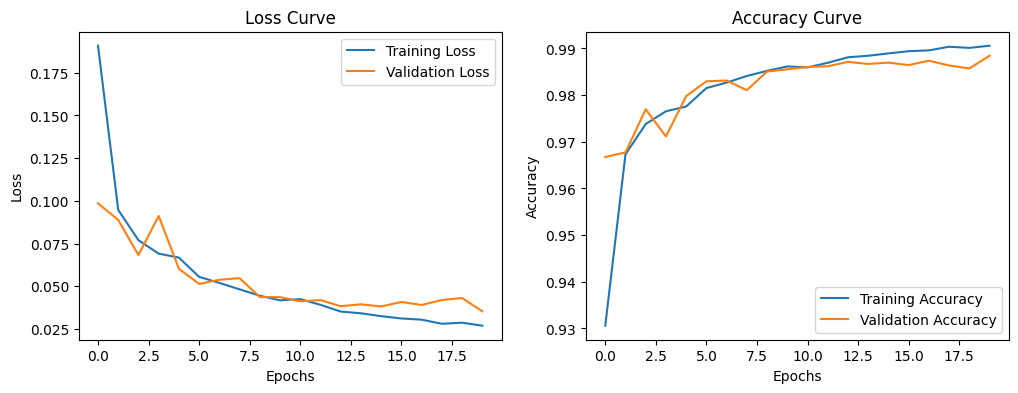

In [6]:
import matplotlib.pyplot as plt

# Train the model and store history
history = model.fit(X_train, y_train, batch_size=2, epochs=20, validation_split=0.2)

# Plot learning curves
def plot_learning_curve(history):
    plt.figure(figsize=(12, 4))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Curve')

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Curve')

    plt.show()

# Call function to plot learning curve
plot_learning_curve(history)

In [ ]:
model.save('C:/ML_Data/new_model_01.h5')

In [ ]:
model.save('C:/ML_Data/new_model_01.keras')